<a href="https://colab.research.google.com/github/Trabelsi-Zahra10/Neural-Networks/blob/main/ML_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pretty_confusion_matrix
!pip install -U matplotlib==3.1.3
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pretty-confusion-matrix 0.1.1 requires matplotlib<4.0.0,>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.


In [2]:
#1- Création d'un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
url = "https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#2- Affichage des 10 premières lignes du DataFrame
data[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#3- Affichage des dimensions du dataframe.
data.shape

(150, 6)

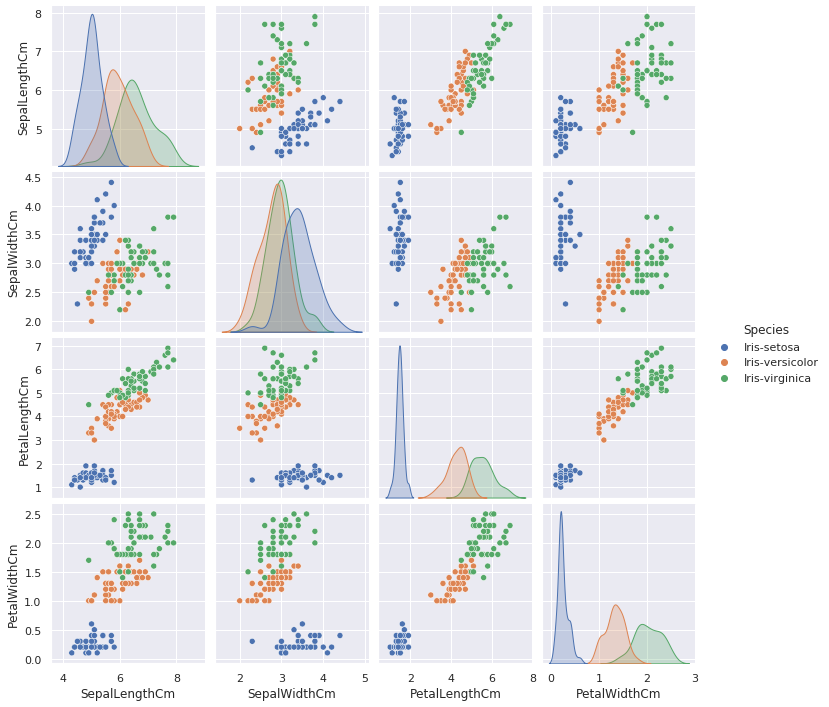

In [ ]:
#4- visualisation des données en fonction de la longueur des pétales et de largeur des sépales
sns.set_theme()
sns.pairplot(data, vars=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'), hue='Species')

In [3]:
#5-labelliser les différentes espèces d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )
dataOut = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
dataOut

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
#6- Affichage du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
dataOut[:10]

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
dataIn = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Newdata = pd.concat([dataIn, dataOut], axis=1)
Newdata[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
#7- la division de dataset en des données d’apprentissage (70%) et des données de test (30%).
X = Newdata[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = Newdata[['Species']]

XTrain,XTest,YTrain,YTest = model_selection.train_test_split(X,Y, test_size=0.3)


In [ ]:
#8- Affichage des 10 premières données d’apprentissage.
XTrain[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
23,5.1,3.3,1.7,0.5
106,4.9,2.5,4.5,1.7
31,5.4,3.4,1.5,0.4
15,5.7,4.4,1.5,0.4
141,6.9,3.1,5.1,2.3
104,6.5,3.0,5.8,2.2
86,6.7,3.1,4.7,1.5
1,4.9,3.0,1.4,0.2
135,7.7,3.0,6.1,2.3
6,4.6,3.4,1.4,0.3


In [ ]:
#8- Affichage des 10 premières données d’apprentissage.
YTrain[:10]

,Species
23,0
106,2
31,0
15,0
141,2
104,2
86,1
1,0
135,2
6,0


In [ ]:
#8- Affichage des 10 premières données de test.
XTest[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
136,6.3,3.4,5.6,2.4
61,5.9,3.0,4.2,1.5
24,4.8,3.4,1.9,0.2
112,6.8,3.0,5.5,2.1
139,6.9,3.1,5.4,2.1
51,6.4,3.2,4.5,1.5
79,5.7,2.6,3.5,1.0
80,5.5,2.4,3.8,1.1
99,5.7,2.8,4.1,1.3
124,6.7,3.3,5.7,2.1


In [ ]:
#8- Affichage des 10 premières données de test.
YTest[:10]

,Species
136,2
61,1
24,0
112,2
139,2
51,1
79,1
80,1
99,1
124,2


In [ ]:
#9- utilisation un perceptron multicouche pour l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150) .
mlp = MLPClassifier(solver = 'lbfgs',  max_iter=150, hidden_layer_sizes=(3,3))


In [ ]:
#10- Evaluation du perceptron en affichant son “accuracy” et le temps de réponse.
#apprentissage
%%time
mlp.fit(XTrain, YTrain.values.ravel())


CPU times: user 53 ms, sys: 1.45 ms, total: 54.5 ms
Wall time: 71.4 ms


MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=150, solver='lbfgs')

In [ ]:
pred = mlp.predict(XTest)
pred

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0,
       2])

In [ ]:
YTest.values

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2]])

In [ ]:
metrics.accuracy_score(pred, YTest) #also with mlp.score(XTest, YTest)

0.9111111111111111

In [ ]:
mlp.loss_ #loss

0.04527326588050786

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

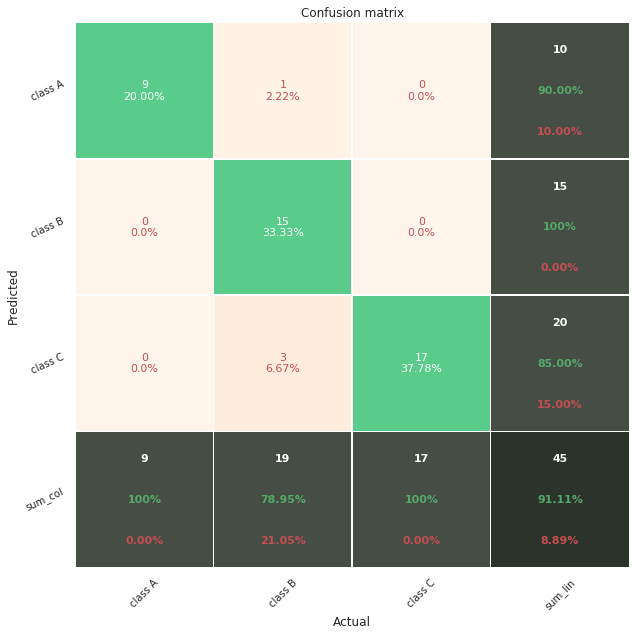

In [ ]:
#11-Affichage de la matrice de confusion associée à notre cas.
from pretty_confusion_matrix import pp_matrix_from_data
cmap = 'PuRd'
pp_matrix_from_data(YTest.values, pred)

In [ ]:
#12- Commentaire:
#D'après la matrice de confusion nous avons 1 individus de classe B ayant été classé comme appartenant à la classe A ce qui est faux
#et nous avons 3 individus de classe B ayant été classé comme appartenant à la classe C ce qui est aussi faux
#ce qui donne une accuracy de 91.1%

In [ ]:
#13- -On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
mlpp = MLPClassifier(solver = 'lbfgs',  max_iter=150, learning_rate_init=0.7, hidden_layer_sizes=(3,3))
mlpp.fit(XTrain, YTrain.values.ravel())


MLPClassifier(hidden_layer_sizes=(3, 3), learning_rate_init=0.7, max_iter=150,
              solver='lbfgs')

In [ ]:
pred = mlpp.predict(XTest)
pred

array([2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0,
       2])

In [ ]:
YTest.values

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
metrics.accuracy_score(pred, YTest)

0.9555555555555556

Training score: 
0.3904761904761905


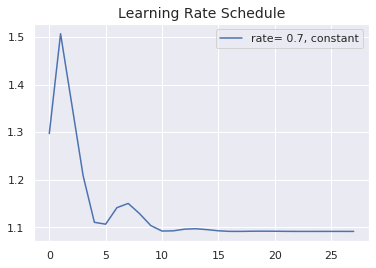

In [ ]:
#14-  la variation du paramètre de taux d’apprentissage
#rate= 0.7, constant
clf = MLPClassifier(solver = 'sgd',  max_iter=150, learning_rate_init=0.7, hidden_layer_sizes=(3,3), learning_rate= "constant")
clf.fit(XTrain, YTrain.values.ravel())

print("Training score: ")
print(clf.score(XTrain, YTrain))
plt.plot(clf.loss_curve_, label='rate= 0.7, constant')
plt.legend()
plt.title("Learning Rate Schedule",fontsize=14)
plt.show()

In [ ]:
clf.score(XTest, YTest)

0.2

Training score: 
0.29523809523809524


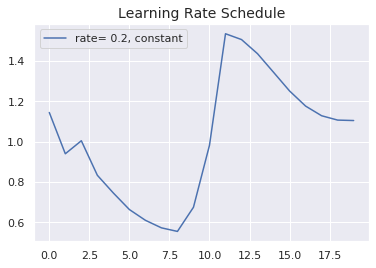

In [ ]:
#rate= 0.2, constant
clf2 = MLPClassifier(solver = 'sgd',  max_iter=150, learning_rate_init=0.2, hidden_layer_sizes=(3,3), learning_rate= "constant")
clf2.fit(XTrain, YTrain.values.ravel())

print("Training score: ")
print(clf2.score(XTrain, YTrain))
plt.plot(clf2.loss_curve_, label='rate= 0.2, constant')
plt.legend()
plt.title("Learning Rate Schedule",fontsize=14)
plt.show()

In [ ]:
clf2.score(XTest, YTest)

0.4222222222222222

Training score: 
0.3904761904761905


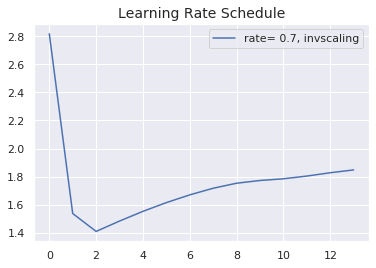

In [ ]:
#rate= 0.7, invscaling
clf3 = MLPClassifier(solver = 'sgd',  max_iter=150, learning_rate_init=0.7, hidden_layer_sizes=(3,3), learning_rate= "invscaling")
clf3.fit(XTrain, YTrain.values.ravel())

print("Training score: ")
print(clf3.score(XTrain, YTrain))
plt.plot(clf3.loss_curve_, label='rate= 0.7, invscaling')
plt.legend()
plt.title("Learning Rate Schedule",fontsize=14)
plt.show()

In [ ]:
clf3.score(XTest, YTest)

0.2

Training score: 
0.7047619047619048


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


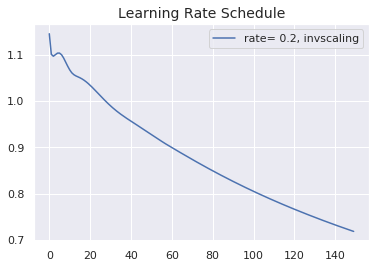

In [ ]:
#rate= 0.2, invscaling
clf4 = MLPClassifier(solver = 'sgd',  max_iter=150, learning_rate_init=0.2, hidden_layer_sizes=(3,3), learning_rate= "invscaling")
clf4.fit(XTrain, YTrain.values.ravel())

print("Training score: ")
print(clf4.score(XTrain, YTrain))
plt.plot(clf4.loss_curve_, label='rate= 0.2, invscaling')
plt.legend()
plt.title("Learning Rate Schedule",fontsize=14)
plt.show()

In [ ]:
clf4.score(XTest, YTest)

0.5777777777777777

Training score: 
0.3904761904761905


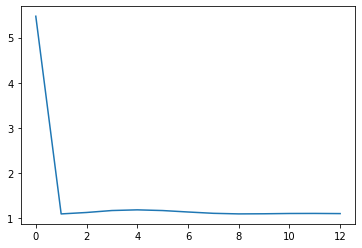

In [43]:
#15- -Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début
rn = MLPClassifier(solver = 'sgd',  max_iter=1500, learning_rate_init=0.7, hidden_layer_sizes=(3,3), learning_rate= "constant")
rn.fit(XTrain, YTrain.values.ravel())
print("Training score: ")
print(rn.score(XTrain, YTrain))
plt.plot(rn.loss_curve_)
plt.show()

In [44]:
predrntrain = rn.predict(XTrain)
predrntrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
predrn = rn.predict(XTest)
predrn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [46]:
metrics.accuracy_score(predrn, YTest) #accuracy

0.2

In [ ]:
#16- Tester d’autres classifieurs de type réseau de neurones

#réseaux de neurones non recurrent à l'aide de la bibliothèque KERAS
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dense, Dropout, CuDNNLSTM


In [ ]:
X = Newdata[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = Newdata[['Species']]

XTrain,XTest,YTrain,YTest = model_selection.train_test_split(X,Y, test_size=0.3)

XTrain = XTrain.to_numpy() #manipulate arrays
YTrain = YTrain.to_numpy()

In [ ]:
model = Sequential()
#Couche d'entrée 
model.add(Dense(4, input_shape=(4,), name='couche_entree',activation='relu'))

#Couche de sortie
model.add(Dense(3, activation='softmax', name='couche_sortie'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Apprentissage
train_history = model.fit(XTrain, YTrain, epochs=500) #Number of epochs to train the model. An epoch is an iteration

Epoch 1/500


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 1.4742 - accuracy: 0.3524
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 1.4417 - accuracy: 0.3524
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 1.4110 - accuracy: 0.3524
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3837 - accuracy: 0.3524
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3570 - accuracy: 0.3524
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3323 - accuracy: 0.3524
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3090 - accuracy: 0.3524
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2880 - accuracy: 0.3524
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2683 - accuracy: 0.3524
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2513 - accuracy: 0.3524
Epoch 11/500
4/4 [=======================

In [ ]:
pred = model.predict(XTest)
y_test=np.argmax(YTest,axis=1)
y_pred=np.argmax(pred,axis=1)
y_pred


2/2 [==============================] - 0s 8ms/step


array([1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       0])

In [ ]:
model.evaluate(XTest, YTest)

2/2 [==============================] - 0s 6ms/step - loss: 0.4801 - accuracy: 0.7778


[0.4800540506839752, 0.7777777910232544]

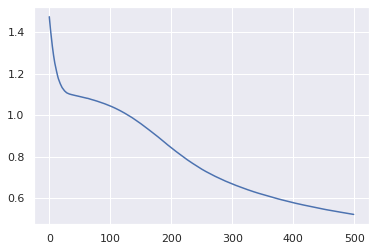

In [ ]:
loss_per_epoch = train_history.history['loss']
plt.plot(loss_per_epoch, label='training loss')

In [ ]:
#réseaux de neurones recurrent à l'aide de la bibliothèque KERAS
X = Newdata[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = Newdata[['Species']]

XTrain,XTest,YTrain,YTest = model_selection.train_test_split(X,Y, test_size=0.3)

In [ ]:
XTrain = XTrain.to_numpy()
YTrain = YTrain.to_numpy()
#réseaux de neurones recurrent LSTM à l'aide de la bibliothèque KERAS
model2 = Sequential()
model2.add(LSTM(4, input_shape=(4,1)))
model2.add(Dropout(0.2))
# Output layer
model2.add(Dense(3, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_history=model2.fit(XTrain, YTrain, epochs=500)

Epoch 1/500
4/4 [==============================] - 4s 7ms/step - loss: 1.0944 - accuracy: 0.3714
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 1.1009 - accuracy: 0.3619
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1080 - accuracy: 0.3810
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0861 - accuracy: 0.4381
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1012 - accuracy: 0.4381
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0936 - accuracy: 0.4762
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0847 - accuracy: 0.4762
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0815 - accuracy: 0.5238
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0879 - accuracy: 0.5143
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0794 - accuracy: 0.5810
Epoch 11/500
4/4 [===========

In [ ]:
pred = model2.predict(XTest)
y_test=np.argmax(YTest,axis=1)
y_pred=np.argmax(pred,axis=1)
y_pred


2/2 [==============================] - 0s 5ms/step


array([1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2,
       0])

In [ ]:
model2.evaluate(XTest, YTest)

2/2 [==============================] - 0s 7ms/step - loss: 0.2465 - accuracy: 0.9333


[0.24651536345481873, 0.9333333373069763]

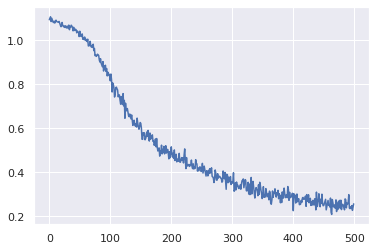

In [ ]:
loss_per_epoch = train_history.history['loss']
plt.plot(loss_per_epoch)

In [ ]:
#17- est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ?
#Dans notre cas on n'a pas besoin d'utiliser un RNN :
#Les réseaux de neurones récurrents sont adaptés pour des données d'entrée de taille variable. 
#Ils conviennent en particulier pour l'analyse de séries temporelles.